# **Stock Price Prediction And Forecasting Using Stacked LSTM**

In [102]:
# importing necessary libraries
import pandas_datareader as pdr
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [103]:
apiKey = ""

In [104]:
# # getting google data upto this date
# df = pdr.get_data_tiingo('AAPL', api_key = apiKey)
# df.head()

In [105]:
# # saving the data to csv file for future processing
# df.to_csv("Datasets/appleData.csv")

In [106]:
# reading the saved dataset
df = pd.read_csv("Datasets/appleData.csv")

In [107]:
# displaying first two records
df.head(2)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-12-12 00:00:00+00:00,171.70,172.39,171.461,172.15,18945457,40.815488,40.979511,40.758674,40.922459,75781828,0.0,1.0
1,AAPL,2017-12-13 00:00:00+00:00,172.27,173.54,172.000,172.50,23142242,40.950985,41.252882,40.886802,41.005659,92568968,0.0,1.0


In [108]:
# displaying last two records
df.tail(2)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1256,AAPL,2022-12-08 00:00:00+00:00,142.65,143.52,141.1,142.36,62128338,142.65,143.52,141.1,142.36,62128338,0.0,1.0
1257,AAPL,2022-12-09 00:00:00+00:00,142.16,145.57,140.9,142.34,76097011,142.16,145.57,140.9,142.34,76097011,0.0,1.0


In [109]:
# Selecting "adjClose" feature
X = df["adjClose"]

In [110]:
X

0        40.815488
1        40.950985
2        40.939099
3        41.355099
4        41.937498
           ...    
1253    146.630000
1254    142.910000
1255    140.940000
1256    142.650000
1257    142.160000
Name: adjClose, Length: 1258, dtype: float64

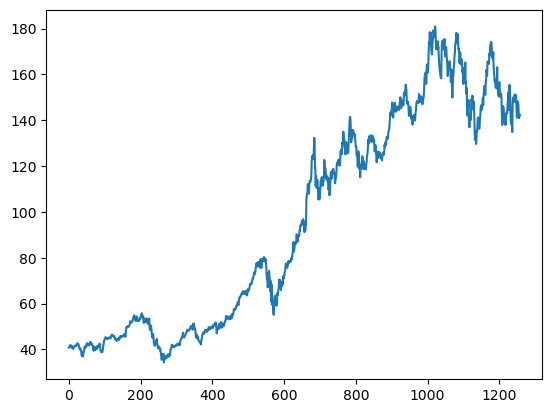

In [111]:
plt.plot(X)

In [112]:
# shape of the splitted data
dShape = X.shape[0]
dShape

1258

In [113]:
# specifying the sizes in percentages
trainSize = int(dShape*0.7)
validationSize = int(dShape*0.3)

In [114]:
# displaying the sizes
trainSize, validationSize

(880, 377)

In [115]:
Xtrian = X.iloc[:trainSize]
Xval = X.iloc[trainSize:trainSize+validationSize]

In [116]:
# displaying training, validation
Xtrian, Xval

(0       40.815488
 1       40.950985
 2       40.939099
 3       41.355099
 4       41.937498
           ...    
 875    124.803822
 876    125.636508
 877    126.023113
 878    125.011994
 879    126.241197
 Name: adjClose, Length: 880, dtype: float64,
 880     129.343945
 881     128.511259
 882     129.016818
 883     130.642539
 884     129.324119
            ...    
 1252    147.810000
 1253    146.630000
 1254    142.910000
 1255    140.940000
 1256    142.650000
 Name: adjClose, Length: 377, dtype: float64)

In [117]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# defining scaler object
scaler = MinMaxScaler(feature_range = (0, 1))

In [118]:
# applying scalling
XtrianScaled = scaler.fit_transform(np.array(Xtrian).reshape(-1, 1))
XvalScaled = scaler.transform(np.array(Xval).reshape(-1, 1))

In [119]:
def dataSetCreater(dataset, timeStamp):
    X = [] # Feature matrix
    y = [] # target variable
    for i in range(len(dataset)-timeStamp):
        a = dataset[i:i+timeStamp]
        X.append(a)
        y.append(dataset[i+timeStamp])
        
    return np.array(X), np.array(y)

In [120]:
# Splitting the data into training, testing, and validation
X_train, y_train = dataSetCreater(XtrianScaled, timeStamp=150)
X_val, y_val = dataSetCreater(XvalScaled, timeStamp=150)

In [121]:
X_train.shape, y_train.shape

((730, 150, 1), (730, 1))

In [122]:
X_val.shape, y_val.shape

((227, 150, 1), (227, 1))

In [123]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [124]:
model = Sequential()
model.add(LSTM(100,input_shape = (150, 1),return_sequences=True))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150, 100)          40800     
                                                                 
 lstm_4 (LSTM)               (None, 150, 100)          80400     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss = "mae", optimizer = "adam")

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, batch_size = 64)

Epoch 1/100
12/12 [==============================] - 16s 917ms/step - loss: 0.1590 - val_loss: 0.0764
Epoch 2/100
12/12 [==============================] - 10s 774ms/step - loss: 0.0469 - val_loss: 0.0894
Epoch 3/100
12/12 [==============================] - 10s 794ms/step - loss: 0.0342 - val_loss: 0.0613
Epoch 4/100
12/12 [==============================] - 10s 853ms/step - loss: 0.0320 - val_loss: 0.0751
Epoch 5/100
12/12 [==============================] - 10s 816ms/step - loss: 0.0304 - val_loss: 0.1057
Epoch 6/100
12/12 [==============================] - 11s 895ms/step - loss: 0.0335 - val_loss: 0.0818
Epoch 7/100
12/12 [==============================] - 26s 2s/step - loss: 0.0332 - val_loss: 0.0562
Epoch 8/100
12/12 [==============================] - 17s 1s/step - loss: 0.0288 - val_loss: 0.0728
Epoch 9/100
12/12 [==============================] - 17s 1s/step - loss: 0.0259 - val_loss: 0.0626
Epoch 10/100
12/12 [==============================] - 9s 711ms/step - loss: 0.0262 - val_lo

In [ ]:
model.save("TSFmodel")

In [125]:
from tensorflow.keras.models import load_model
model = load_model("TSFmodel")

In [126]:
# making prediction on validation set
y_valPred = model.predict(X_val)
y_trainPred = model.predict(X_train)

In [127]:
# Transform back to original form
y_valPred = scaler.inverse_transform(y_valPred)
y_trainPred = scaler.inverse_transform(y_trainPred)

In [128]:
# Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_train, y_trainPred)))
print(math.sqrt(mean_squared_error(y_val, y_valPred)))

80.25386382392762
145.48667671138836


## **Evalutaion**

In [33]:
# plt.plot(model.history['loss'])
# plt.plot(model.history['val_loss'])
# plt.show()

In [129]:
len(y_trainPred)

730

### **Plotting Original set, Training and Validation set predictions**

In [165]:
# time stamp 
# first prediction starts after this time stamp
stamp = 150

**Preparing for Ploting prediction on training set**

In [166]:
# Original array shape
print(f"Original array shape: {X.shape}")
trainingPredPlot = np.empty_like(X)
trainingPredPlot[:] = np.nan

# Shipting the training prediction 150 time stamp and assigning training prediction values to this phase
trainingPredPlot[stamp:len(y_trainPred)+stamp] = y_trainPred.reshape(1, -1)

# empty array shape
print(f"Empty array shape: {trainingPredPlot.shape}")

Original array shape: (1258,)
Empty array shape: (1258,)


In [175]:
# shape of the training prediction set
print(len(y_trainPred))

# Time stamp, Training set length, Time Stamp, validation set length + 1
150+730+150+227+1

730


1258

**Preparing for Ploting prediction on training set**

In [172]:
testingPredPlot = np.empty_like(X)
testingPredPlot[:] = np.nan
testingPredPlot[len(y_trainPred)+(stamp*2)+1:] = y_valPred.reshape(1, -1)

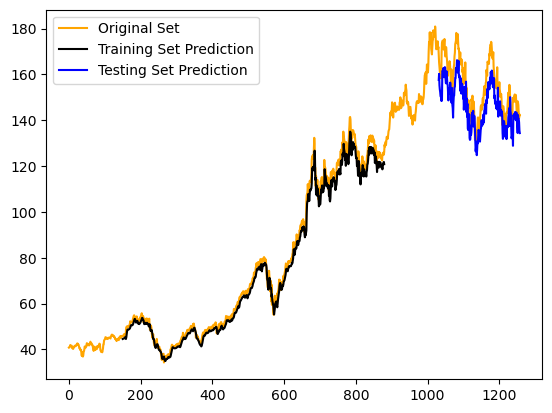

In [176]:
# plot baseline and predictions
plt.plot(X, label = "Original Set", color = "orange")
plt.plot(trainingPredPlot, label = "Training Set Prediction", color = "black")
plt.plot(testingPredPlot, label = "Testing Set Prediction", color = "blue")
plt.legend()
plt.show()